<h1>DELVING DEEP INTO THE CHARACTER HISTORY OF GENSHIN IMPACT</h1>


Genshin has no doubt been one of the most "impactful" (hehe, get it??) gacha games out there in the history of gacha games. It's made its mark in the gaming industry and has <br>
continued to do so for over 3 years by continuously giving out major updates all throughout the years. Since it's gotten so big, it makes us wonder just how much progress has <br>
been made to the game's character roster.


The game started out with Xiangling as the only polearm; now we have over 16 of them. As such, I decided to put up a little data analysis project (through a Jupyter notebook) <br>
to see just how much of the game's content, as well as character roster, has changed overtime.<br><br>

For this one, we'll first have to import the following libraries in Python to get started with the Data Analysis Project:


In [30]:
#Import the necessary Python libraries:

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [31]:
# Load dataset
df = pd.read_csv("genshin_characters_v1.csv")

# Display first 5 rows
display(df.head())

# Check dataset information
df.info()

,character_name,star_rarity,region,vision,arkhe,weapon_type,release_date,model,constellation,birthday,...,atk_1_20,def_1_20,ascension_special_stat,special_0,special_1,special_2,special_3,special_4,special_5,special_6
0,Albedo,5,Mondstadt,Geo,NaN,Sword,23-12-2020,Medium Male,Princeps Cretaceus,13-Sep,...,20,68,Geo DMG Bonus,0.00%,0.00%,7.20%,14.40%,14.40%,21.60%,28.80%
1,Alhaitham,5,Sumeru,Dendro,NaN,Sword,18-01-2023,Tall Male,Vultur Volans,11-Feb,...,24,60,Dendro DMG Bonus,0.00%,0.00%,7.20%,14.40%,14.40%,21.60%,28.80%
2,Aloy,5,Mondstadt,Cryo,NaN,Bow,01-09-2021,Medium Female,Nora Fortis,04-Apr,...,18,53,Cryo DMG Bonus,0.00%,0.00%,7.20%,14.40%,14.40%,21.60%,28.80%
3,Amber,4,Mondstadt,Pyro,NaN,Bow,28-09-2020,Medium Female,Lepus,10-Aug,...,19,50,ATK,0.00%,0.00%,6.00%,12.00%,12.00%,18.00%,24.00%
4,Arataki Itto,5,Inazuma,Geo,NaN,Claymore,14-12-2021,Tall Male,Taurus Iracundus,01-Jun,...,18,75,CRIT Rate,0.00%,0.00%,4.80%,9.60%,9.60%,14.40%,19.20%


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 89 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   character_name           94 non-null     object
 1   star_rarity              94 non-null     int64 
 2   region                   94 non-null     object
 3   vision                   94 non-null     object
 4   arkhe                    14 non-null     object
 5   weapon_type              94 non-null     object
 6   release_date             94 non-null     object
 7   model                    94 non-null     object
 8   constellation            94 non-null     object
 9   birthday                 94 non-null     object
 10  special_dish             83 non-null     object
 11  affiliation              84 non-null     object
 12  limited                  94 non-null     bool  
 13  voice_en                 94 non-null     object
 14  voice_cn                 94 non-null     obj

The table above is the table that we'll be dealing with. In this analysis project, we'll be going over the game's progress in terms of its character roster<br>
and how much it has progressed, by having new characters in, overtime. Specifically, we'll want to answer the following questions:

<ul>
    <li>How many characters do we currently have?</li>
        <ul>
         <li>How many of them are 4 stars? 5 Stars?</li>
        </ul>
    <li>How many characters are there in each major version?</li>
        <ul>
         <li>How many of them released in 1.X? 2.X? 3.X? 4.X? </li>
         <li>Which regions do they hail from?</li>
        </ul>
    <li>How many characters of a specific element are there?</li>
        <ul>
         <li>How many of them are 4 stars? 5 Stars?</li>
           <li>Which regions do they hail from?</li>
        </ul>
     <li>How many characters wielding a specific weapon are there?</li>
        <ul>
            <li>How many of them are 4 stars? 5 Stars?</li>
           <li>How many characters of a specific element are there?</li>
        </ul>
    <li>How many male characters are there? Female characters?</li>
        <ul>
         <li>How many of them are 4 stars? 5 Stars?</li>
         <li>How many of each body type are there?</li>
        </ul>
</ul>


# Data Cleaning


In [32]:
# Check for missing values
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])

'''
# Handling missing values:
# 1. Drop rows with missing values
cleaned_df_drop = genshin.dropna()
# Drop Column with  missing values
cleaned_df_drop = genshin.drop('col_name', axis=1)

# 2. Fill missing values using different imputation methods:
#    a) Fill numerical columns with mean
genshin.fillna(genshin.mean(numeric_only=True), inplace=True)

#    b) Fill categorical columns with mode
for col in genshin.select_dtypes(include=['object']).columns:
    genshin[col].fillna(genshin[col].mode()[0], inplace=True)

#    c) Fill using forward fill method (propagate last valid value forward)
genshin.fillna(method='ffill', inplace=True)

#    d) Fill using backward fill method (propagate next valid value backward)
genshin.fillna(method='bfill', inplace=True)

# Verify if missing values are handled
display(genshin.isnull().sum())'
'''

arkhe                      80
special_dish               11
affiliation                10
ascension_boss_material    10
dtype: int64

"\n# Handling missing values:\n# 1. Drop rows with missing values\ncleaned_df_drop = genshin.dropna()\n# Drop Column with  missing values\ncleaned_df_drop = genshin.drop('col_name', axis=1)\n\n# 2. Fill missing values using different imputation methods:\n#    a) Fill numerical columns with mean\ngenshin.fillna(genshin.mean(numeric_only=True), inplace=True)\n\n#    b) Fill categorical columns with mode\nfor col in genshin.select_dtypes(include=['object']).columns:\n    genshin[col].fillna(genshin[col].mode()[0], inplace=True)\n\n#    c) Fill using forward fill method (propagate last valid value forward)\ngenshin.fillna(method='ffill', inplace=True)\n\n#    d) Fill using backward fill method (propagate next valid value backward)\ngenshin.fillna(method='bfill', inplace=True)\n\n# Verify if missing values are handled\ndisplay(genshin.isnull().sum())'\n"

In [33]:
genshin = df.drop('arkhe', axis=1)
#We can leave the rest NaN values coz they are all categorical and do not hinder our calculations

In [34]:
# Check for duplicate rows
duplicates = genshin.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicate rows
#genshin = genshin.drop_duplicates()


Number of duplicate rows: 0


In [103]:
# Summary statistics
display(genshin.describe())

# Save cleaned dataset
#genshin.to_csv("genshin_characters_cleaned.csv", index=False)
#print("Data Cleaning Completed Successfully!")

,hp_90_90,atk_90_90,def_90_90,hp_80_90,atk_80_90,def_80_90,hp_80_80,atk_80_80,def_80_80,hp_70_80,...,def_40_40,hp_20_40,atk_20_40,def_20_40,hp_20_20,atk_20_20,def_20_20,hp_1_20,atk_1_20,def_1_20
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,...,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,11762.000000,249.468085,698.117021,11037.010638,232.095745,649.340426,10400.510638,220.531915,617.276596,9582.968085,...,286.521277,3214.680851,68.074468,190.808511,2453.095745,51.989362,145.648936,951.329787,19.914894,56.319149
std,1608.223919,54.137956,96.443962,1819.188017,50.174549,89.686617,1408.639019,47.484622,84.991891,1295.236919,...,38.319183,410.126737,13.980201,25.678021,297.289406,10.388677,19.335581,113.452504,3.856734,7.523744
min,9189.000000,106.000000,499.000000,8553.000000,99.000000,464.000000,8144.000000,94.000000,440.000000,7508.000000,...,200.000000,2555.000000,29.000000,134.000000,1978.000000,21.000000,100.000000,763.000000,8.000000,38.000000
25%,10562.500000,212.000000,628.500000,9822.250000,198.000000,584.250000,9330.250000,188.000000,556.000000,8594.250000,...,255.000000,2882.750000,59.000000,169.000000,2201.250000,46.000000,129.250000,850.250000,18.000000,50.250000
50%,11537.000000,232.500000,683.000000,10732.000000,216.000000,635.000000,10216.000000,205.500000,605.000000,9418.500000,...,284.000000,3205.000000,63.500000,190.000000,2479.000000,48.500000,147.000000,967.500000,19.000000,57.000000
75%,12974.750000,300.500000,764.500000,12062.250000,279.500000,710.500000,11447.500000,265.500000,674.500000,10542.000000,...,313.000000,3486.250000,81.000000,208.750000,2646.750000,61.000000,158.750000,1030.000000,23.000000,61.750000
max,15674.000000,352.000000,959.000000,21080.000000,327.000000,892.000000,13829.000000,310.000000,846.000000,12736.000000,...,386.000000,4211.000000,94.000000,258.000000,3165.000000,79.000000,194.000000,1220.000000,27.000000,75.000000


# Exploratory Data Analysis


<h2>Character History</h2>


Genshin Impact now contains more than 85 characters! There's a lot in the collection. Character counts for both 4 and 5 stars are listed below.


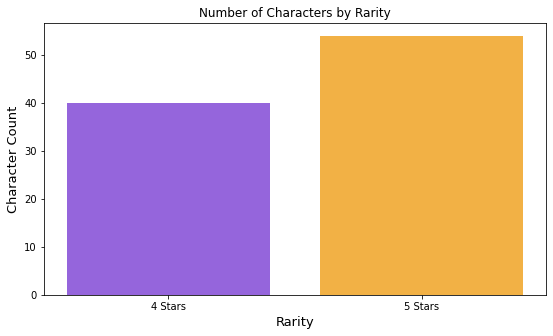

In [71]:

rarities = ["4 Stars", "5 Stars"]

#Filter the table data based on 4 star and 5 star count

# Ensure correct data type
genshin['star_rarity'] = genshin['star_rarity'].astype(str)  # Convert to string if needed

# Filter data
fourStars = genshin[genshin['star_rarity'] == "4"]
fiveStars = genshin[genshin['star_rarity'] == "5"]

# Plot
plt.figure(figsize=(9, 5))
plt.bar([0, 1], [len(fourStars), len(fiveStars)], color=['#9565DC', '#F2B145'])
plt.xticks([0, 1], ["4 Stars", "5 Stars"])  # Explicitly set x-tick labels
plt.title("Number of Characters by Rarity")
plt.xlabel("Rarity", fontsize=13)
plt.ylabel("Character Count", fontsize=13)
plt.show()

Throughout the game, there have been a total of 40 4 Stars and over 45 5 Stars. This goes to show that the game has been heavily leaning<br>
towards the creation of more 5 star units, which isn't a surprise. The more powerful units, the merrier!


Of course, each of these characters come from different regions, as the game heavily emphasizes on the massive<br>
regions and their respective environments. Just how many characters of a certain region are there?


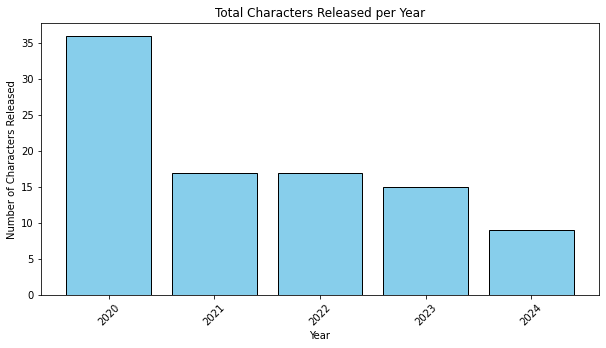

In [102]:
# Load dataset (assuming 'version' is a string and 'count' is the number of characters released)
df = pd.read_csv("genshin_characters_v1.csv")

# Ensure release_date is a datetime type
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce", dayfirst=True)

# Drop rows where release_date could not be converted
df = df.dropna(subset=["release_date"])

# Extract release year
df["release_year"] = df["release_date"].dt.year

# Count number of characters per year
yearly_counts = df["release_year"].value_counts().sort_index()

# Plot bar graph
plt.figure(figsize=(10, 5))
plt.bar(yearly_counts.index.astype(str), yearly_counts.values, color="skyblue", edgecolor="black")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Number of Characters Released")
plt.title("Total Characters Released per Year")
plt.xticks(rotation=45)

# Show graph
plt.show()

As we can in the intial launch of the game there more characters released, and we can note the new characters are being released average same rate every year.


# Regions In Genshin


In [47]:
genshin['region'].unique()

array(['Mondstadt', 'Sumeru', 'Inazuma', 'Snezhnaya', 'Liyue', 'Fontaine'],
      dtype=object)

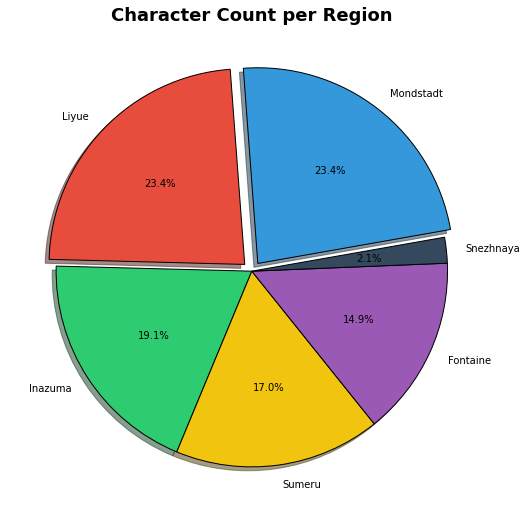

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define regions
regions = ["Mondstadt", "Liyue", "Inazuma", "Sumeru", "Fontaine", "Snezhnaya"]

# Get counts per region
regionCount = [
    len(genshin[genshin['region'] == region]) for region in regions
]

# Define custom colors
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f1c40f', '#9b59b6', '#34495e']

# Define explode effect (pops out the largest slice)
explode = [0.05 if count == max(regionCount) else 0 for count in regionCount]

# Create the pie chart
plt.figure(figsize=(9, 9))
plt.pie(
    regionCount, 
    labels=regions, 
    autopct='%1.1f%%',   # Show percentage
    colors=colors, 
    explode=explode, 
    startangle=10, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},  # Enhancing slice edges
    shadow=True  # Adding depth effect
)

# Title with better styling
plt.title("Character Count per Region", fontsize=18, fontweight='bold')

# Display the chart
plt.show()


In [51]:
#Get the percentages of the character distributions by doing an operation on all the character counts
regionPercentage = np.round(( np.array(regionCount) / len(genshin) ) * 100,2)

#Print out the individual percentages as well as the character count
print("Percentages of characters per Region: \n\n========================================\n")
for x in range (len(regionPercentage)):
    print(regions[x] + ": " + str(regionPercentage[x]) + "%; with " + str(regionCount[x]) + " characters")

Percentages of characters per Region: 


Mondstadt: 23.4%; with 22 characters
Liyue: 23.4%; with 22 characters
Inazuma: 19.15%; with 18 characters
Sumeru: 17.02%; with 16 characters
Fontaine: 14.89%; with 14 characters
Snezhnaya: 2.13%; with 2 characters


<h3>As we can see above, most characters hail from LIYUE adn MONDSTAT given how Hoyoverse has predominantly been focusing on Mondstadt and Liyue prior to the other regions


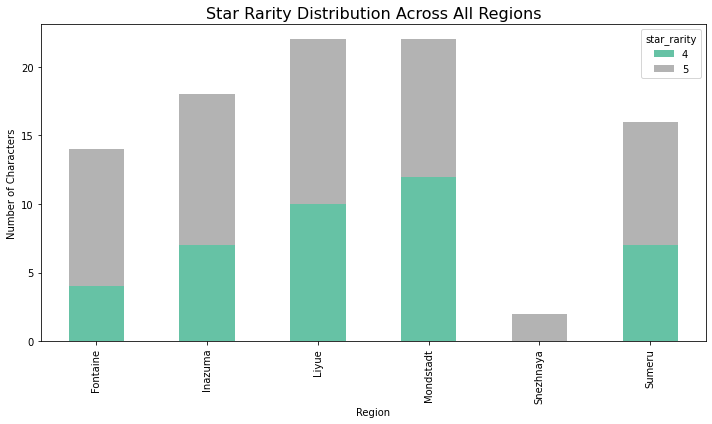

In [68]:
star_rarity_distribution = df.groupby('region')['star_rarity'].value_counts().unstack().fillna(0)
star_rarity_distribution.plot(kind='bar', stacked=True, figsize=(10,6), cmap='Set2')
plt.title('Star Rarity Distribution Across All Regions', fontsize=16)
plt.ylabel('Number of Characters')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

<h2>Characters of Specific Elements/Vision</h2>


The main focus of Genshin Impact's lore and gameplay is it's Elemental System, and how there are different characters wielding different elements,<br>
making for a diverse set of gameplay styles. As Genshin released characters overtime, characters of a specific element gradually began to increase.


Cryo       15
Pyro       15
Electro    15
Hydro      14
Anemo      13
Geo        11
Dendro     11
Name: vision, dtype: int64


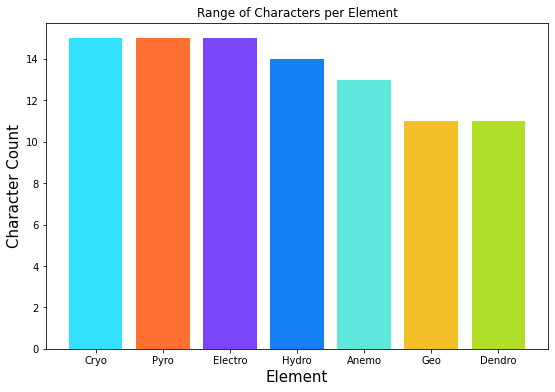

In [61]:
#List out the different elements
elements = ["Cryo", "Pyro", "Electro", "Hydro", "Anemo", "Geo", "Dendro"]

#Get the number of characters of a specific element in the table
elementCount = genshin["vision"].value_counts()
print(elementCount)

#Initialize plotting out the bar graph
f = plt.figure()
f.set_figwidth(9)
f.set_figheight(6)
plt.bar(elements,elementCount, color = ('#33E0FF','#FF7133','#7B45F9','#1480F3','#5FE9DD','#F3C127','#B1DE26'))
plt.title("Range of Characters per Element")
plt.xlabel("Element",fontsize = 15)
plt.ylabel("Character Count",fontsize = 15)
plt.show()

<h3>Most of the characters in the roster are Pyro, Cryo adn Electro.</h3>

We then have Anemor or Hydro characters being the next largest group. This makes sense considering<br>
the main Elemental Reaction cycle revoles around these 4. <br>

Meanwhile Dendro and Geo have lower counts but have the same amount.<br>
Dendro is relatively new, but has been seen to have potential in the long run. <br>
Geo, while it's been there from the start, has issues in terms of its playability <br>


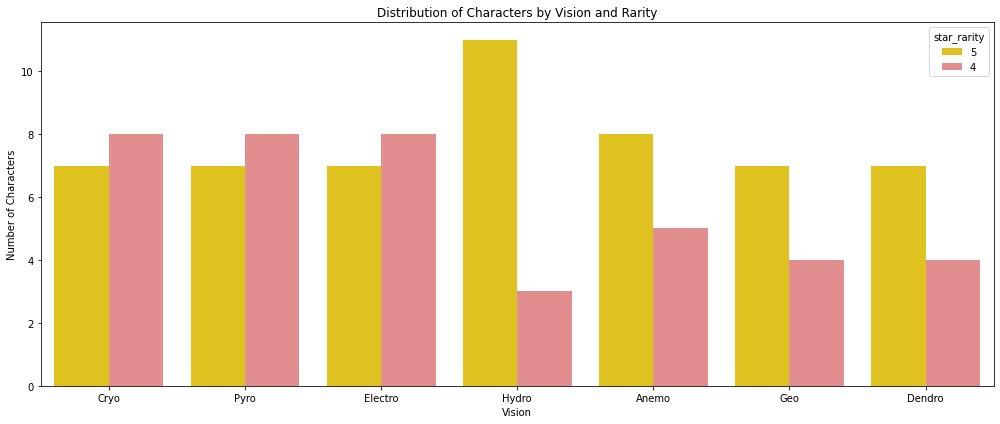

In [100]:
# Define the element order
element_order = ["Cryo", "Pyro", "Electro", "Hydro", "Anemo", "Geo", "Dendro"]

# Define palette for rarity
palette_rarity = {'4': 'lightcoral', '5': 'gold'}

# Set figure size
plt.figure(figsize=(14, 6))

# Vision distribution with rarity
sns.countplot(data=genshin, x="vision", hue="star_rarity", palette=palette_rarity, order=element_order)

# Labels and title
plt.ylabel("Number of Characters")
plt.xlabel("Vision")
plt.title("Distribution of Characters by Vision and Rarity")

# Apply layout fix
plt.tight_layout()

# Show plot
plt.show()

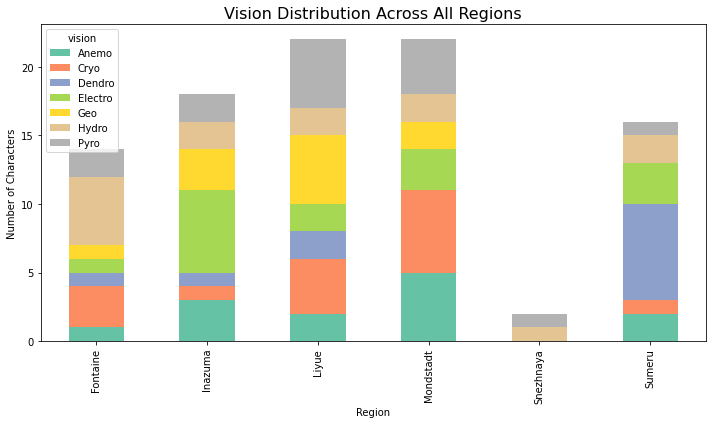

In [66]:
vision_distribution = df.groupby('region')['vision'].value_counts().unstack().fillna(0)
vision_distribution.plot(kind='bar', stacked=True, figsize=(10,6),cmap ='Set2')
plt.title('Vision Distribution Across All Regions', fontsize=16)
plt.ylabel('Number of Characters')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

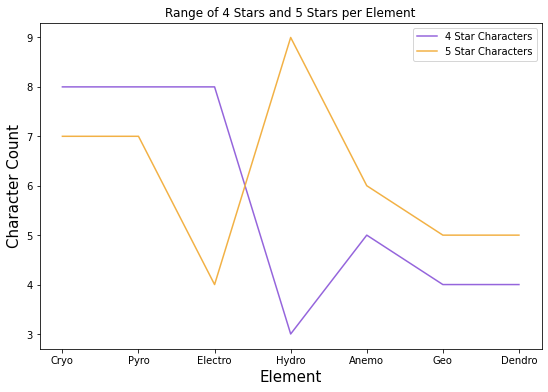

In [72]:
#Initialize lists for 4 star characters and 5 star characters of a specific element respectively
fourStarElements, fiveStarElements = [],[]

#Append the counts, for characters of a specific element, to their respective lists
for x in range (len(elements)):
    fourStarElements.append(len((fourStars[fourStars["vision"] == elements[x]]).value_counts()))
    fiveStarElements.append(len((fiveStars[fiveStars["vision"] == elements[x]]).value_counts()))

#Initialize the plotting for the figure
f = plt.figure()
f.set_figwidth(9)
f.set_figheight(6)
plt.plot(elements,fourStarElements, color=('#9565DC'))
plt.plot(elements,fiveStarElements, color=('#F2B145'))
plt.title("Range of 4 Stars and 5 Stars per Element")
plt.xlabel("Element",fontsize = 15)
plt.ylabel("Character Count",fontsize = 15)
plt.legend(['4 Star Characters','5 Star Characters'])
#plt.text(0,4.5,"There are about \n" + str(sum(fourStarElements)) + " 4 Star Characters...",fontsize=8)
#plt.text(0,3.7,"...and there are about \n" + str(sum(fiveStarElements)) + " 5 Star Characters",fontsize=8)
#plt.text(0,3,"The other 2 are a special case",fontsize=8)
plt.show()


<h3>In terms of the 5 Stars, a lot of them belong to the Hydro element. Though Hydro was scarce back then, it's revitalizing itself by becoming meta.</h3><br>


Although with the release of many regions, characters of a specific element have been prioritized for release.<br>
This poses the question of how many characters of a specific element hail from a certain region


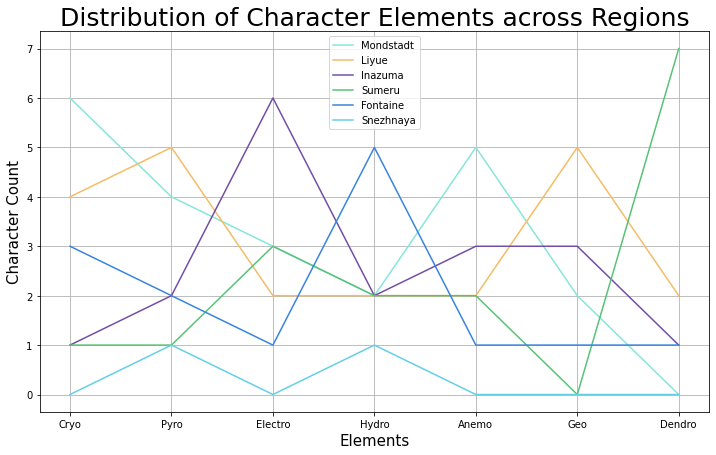

In [73]:
#Get the list of elements from the other part of the code
#Initialize 'regional elements as an empty multidimensional array
colorList = ['#85E6DA','#F5BC65','#724DA6','#57C276','#3783DF','#62CFE9']
regionElementList = []
#Use a for loop to add elements within a specific array, then add them into the main array
for x in range (len(regions)):
    regionAppend = genshin[genshin['region'] == regions[x]]
    regionalElements = []
    for y in range(len(elements)):
        regionalElements.append(len(regionAppend[regionAppend["vision"] == elements[y]]))
    regionElementList.append(regionalElements)

#Plot each of the arrays into their respective areas using a for loop
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(7)
for z in range (len(regions)):
    plt.plot(elements,regionElementList[z],color=(colorList[z]))


#Show the plot
plt.grid()
plt.title("Distribution of Character Elements across Regions",fontsize=25)
plt.xlabel("Elements", fontsize=15)
plt.ylabel("Character Count", fontsize=15)
plt.legend(regions)
plt.show()

<h3>Based on the graph above, here's how dominant an element is over a certain region:</h3>
<ul>
    <li>Mondstadt: Cryo</li>
    <li>Liyue: Pyro (Geo due to MC)</li>
    <li>Inazuma: Electro</li>
    <li>Sumeru: Dendro</li>
    <li>Fontaine: Hydro and Cryo are tied</li>
    </li>Snezhnaya: Not enough to say</li>
</ul>


<h2>Characters Wielding Different Weapons</h2>


Of course, each of the characters wield their own weapons. Sometimes, these weapon choices offer<br>
a chance to exploire different combat styles and strategies


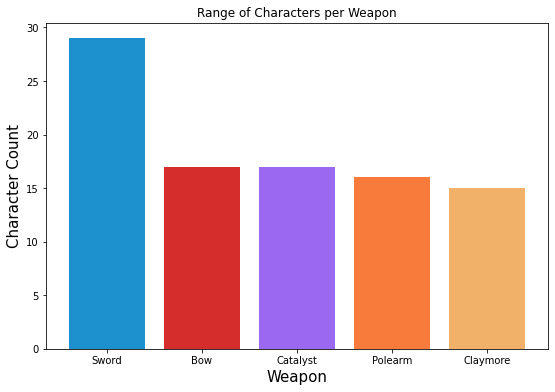

In [74]:
#Initialize the list of weapons
weapons = ["Sword","Bow","Catalyst","Polearm","Claymore"]

#Count how many characters, wielding a specific weapon, therem are
weaponCount = genshin["weapon_type"].value_counts()

#Initialize the bar plot
f = plt.figure()
f.set_figwidth(9)
f.set_figheight(6)
plt.bar(weapons,weaponCount,color=('#1D90CE','#D52C2C','#9A68F1','#F87B3C','#F1B168'))
plt.title("Range of Characters per Weapon")
plt.xlabel("Weapon",fontsize = 15)
plt.ylabel("Character Count",fontsize = 15)
plt.show()

<h3>Most of the characters are sword users, while the least amount of characters are claymore users</h3><br>
The reast of the weapon types (like bows, catalysts, and polearms) have a more or less equal amount.<br><br>
Though, it should be noted that weapon types don't have much of an influence on the meta, so the number<br>
of characters wielding a specific weapon don't hold much weight here.


However, just like before, 5 stars and 4 stars wield different types.


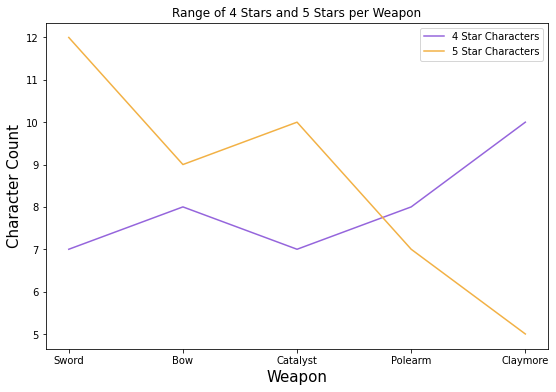

In [75]:
#Initalize the list of 4 stars and 5 stars wielding a specific weapon
fourStarWeapons, fiveStarWeapons = [],[]

#Append each of them to their respecitve lists
for x in range (len(weapons)):
    fourStarWeapons.append(len((fourStars[fourStars["weapon_type"] == weapons[x]]).value_counts()))
    fiveStarWeapons.append(len((fiveStars[fiveStars["weapon_type"] == weapons[x]]).value_counts()))

#Initially plot out the figure
f = plt.figure()
f.set_figwidth(9)
f.set_figheight(6)

plt.plot(weapons,fourStarWeapons, color=('#9565DC'))
plt.plot(weapons,fiveStarWeapons, color=('#F2B145'))
plt.title("Range of 4 Stars and 5 Stars per Weapon")
plt.xlabel("Weapon",fontsize = 15)
plt.ylabel("Character Count",fontsize = 15)
plt.legend(['4 Star Characters','5 Star Characters'])
#plt.text(0,6.3,"There are about \n" + str(sum(fourStarWeapons)) + " 4 Star Characters...",fontsize=8)
#plt.text(0,5.6,"...and there are about \n" + str(sum(fiveStarWeapons)) + " 5 Star Characters",fontsize=8)
#plt.text(0,5,"The other 2 are a special case",fontsize=8)
plt.show()

The relationship between weapon types of a certain rarity is rather interesting here:<br><br>

Most 5 Star Characters are Sword users, while the least amount of them are claymore users.<br>
Subsequently, most 4 Star Characters are Claymore users, while the least amount of them are sword users.<br>
The amount of bows and polearms are equal, while the amount of catalyst users between the two are spread out.<br><br>

In order words, the number of characters, wielding a specific weapon, for both 4 stars and 5 stars...<br>

<h3>...is INVERSELY PROPORTIONAL</h3><br>


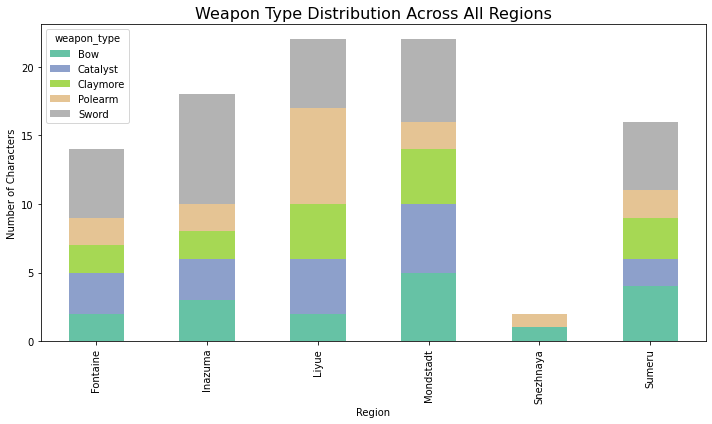

In [76]:
weapon_distribution = df.groupby('region')['weapon_type'].value_counts().unstack().fillna(0)
weapon_distribution.plot(kind='bar', stacked=True, figsize=(10,6), cmap='Set2')
plt.title('Weapon Type Distribution Across All Regions', fontsize=16)
plt.ylabel('Number of Characters')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

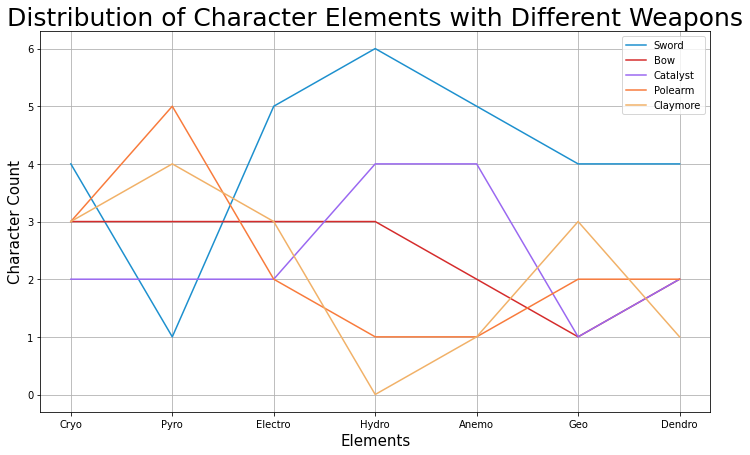

In [77]:
#Initialize the list containing the number of characters of a specificv element...
#...wielding a certain weapon
weaponElementList = []
colorListTwo = ['#1D90CE','#D52C2C','#9A68F1','#F87B3C','#F1B168']
#Use a for loop to add elements within a specific array, then add them into the main array
for x in range (len(weapons)):
    weaponAppend = genshin[genshin['weapon_type'] == weapons[x]]
    weaponElements = []
    for y in range(len(elements)):
        weaponElements.append(len(weaponAppend[weaponAppend["vision"] == elements[y]]))
    weaponElementList.append(weaponElements)

#Plot each of the arrays into their respective areas using a for loop
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(7)
for z in range (len(weapons)):
    plt.plot(elements,weaponElementList[z],color=colorListTwo[z])


#Show the plot
plt.grid()
plt.title("Distribution of Character Elements with Different Weapons",fontsize=25)
plt.xlabel("Elements", fontsize=15)
plt.ylabel("Character Count", fontsize=15)
plt.legend(weapons)
plt.show()

<h3>Based on the graph above, the most amount of weapons per element are as follows: </h3>
<ul>
    <li>Cryo: Sword</li>
    <li>Pyro: Polearm</li>
    <li>Hydro: Sword, Catalyst</li>
    <li>Electro: Sword (due to MC) else Claymore and Bow</li>
    <li>Anemo: Sword</li>
    <li>Geo: Sword (due to MC) else Claymore</li>
    <li>Dendro:Sword(due to MC) else Everything except Claymore</li>
</ul>

As stated before, the number of characters wielding a certain weapon have nothing to do with the impact<br>
of the game as a whole. The number is just there for the sake of being there.<br>


<h2>Range of Character's Model Type</h2>


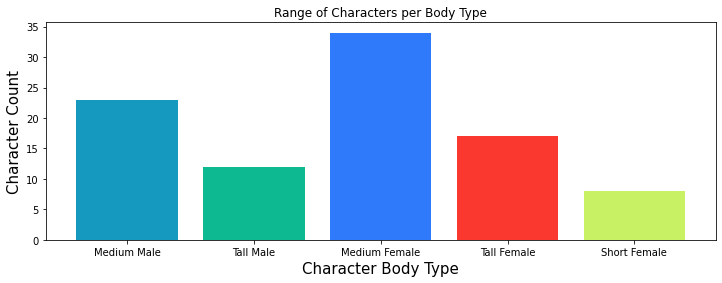

In [83]:
bodyTypes = ["Medium Male","Tall Male","Medium Female","Tall Female","Short Female"]
bodyTypeList = []
for x in range(len(bodyTypes)):
    bodyTypeList.append(len(genshin[genshin['model'] == bodyTypes[x]]))
f = plt.figure()
f.set_figwidth(12)
plt.bar(bodyTypes,bodyTypeList,color=('#1699BF','#0CB990','#2F79FB','#FB382F','#C9F164'))
plt.title("Range of Characters per Body Type")
plt.xlabel("Character Body Type",fontsize = 15)
plt.ylabel("Character Count",fontsize = 15)
plt.show()

<h3>Based on the graph, the medium female body type is the most used; it's used on 29 characters. The rest of the body types are marked like this: </h3>

<ul>
<li>Medium Male: 18 characters (+5 MC)</li>
<li>Tall Male: 12 characters</li>
<li>Medium Female: 29 characters (+5 MC)</li>
<li>Tall Female: 17 characters</li>
<li>Short Female: 8 Characters</li>
</ul>


Hoyoverse has seen to have drawn preference towards a specific body type. However, the ones like the tall male and the short female appear to be underutilized.<br>
This could also tie in with the fans wanting more of a specific body type. Throughout the game's history, it's also been seen that they're<br>
trying to deviate from standard body types in such a way, but not as much because it might break pre-established consistency.<br>


## Element-vise Hight stats Chacraters


In [106]:


def find_best_characters_by_atk(data, vision, ascension_levels):
    """Filters and ranks characters by ATK at different ascension levels for a given Vision."""
    filtered_data = data[data["vision"] == vision][["character_name"] + ascension_levels]
    return filtered_data.sort_values(by="atk_90_90", ascending=False)

# Load dataset
genshin = pd.read_csv("genshin_characters_v1.csv")

# Define ascension levels
ascension_levels = ["atk_20_20", "atk_40_40", "atk_60_60", "atk_80_80", "atk_90_90"]

# Find best characters for Pyro
best_characters = find_best_characters_by_atk(genshin, "Pyro", ascension_levels)

# Display results
print(best_characters)


   character_name  atk_20_20  atk_40_40  atk_60_60  atk_80_80  atk_90_90
5      Arlecchino         69        138        222        302        342
19          Diluc         68        135        217        295        335
91        Yoimiya         65        130        209        285        323
46          Lyney         64        127        206        280        318
40           Klee         63        125        202        274        311
28         Gaming         65        126        199        267        302
18          Dehya         53        106        172        234        265
86         Xinyan         54        103        164        220        249
88         Yanfei         52        100        158        213        240
82      Xiangling         48         94        148        200        225
3           Amber         48         93        147        198        223
67          Thoma         43         84        133        179        202
12      Chevreuse         42         80        127 

C:\Users\Owner\AppData\Local\Temp\ipykernel_6904\180872642.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


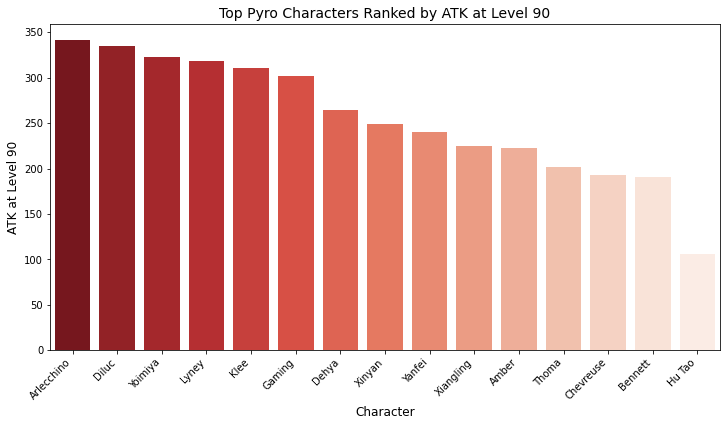

In [105]:
# Define ascension levels
ascension_levels = ["atk_20_20", "atk_40_40", "atk_60_60", "atk_80_80", "atk_90_90"]

def find_best_characters_by_atk(df, vision, ascension_levels):
    # Filter characters based on Vision (element)
    filtered_data = df[df["vision"] == vision]
    
    # Select relevant columns
    columns = ["character_name"] + ascension_levels
    best_characters = filtered_data[columns]

    # Sort by highest ATK at level 90 as primary ranking factor
    best_characters = best_characters.sort_values(by="atk_90_90", ascending=False)
    
    return best_characters

# Set Vision to "Pyro"
vision = "Pyro"

# Get best characters by ATK
best_characters = find_best_characters_by_atk(genshin, vision, ascension_levels)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(
    data=best_characters,
    x="character_name",
    y="atk_90_90",
    palette="Reds_r"
)

# Labels and Title
plt.xlabel("Character", fontsize=12)
plt.ylabel("ATK at Level 90", fontsize=12)
plt.title(f"Top {vision} Characters Ranked by ATK at Level 90", fontsize=14)
plt.xticks(rotation=45, ha="right")

# Show plot
plt.show()


<h2>Overall...</h2>

Genshin has made significant progress in terms of its character roster over the years. We got more characters belonging to certain elements,<br>
which paved the way for even more potential playstyles, potential playstyles, and overall chances to explore the world of Teyvat with your favorite characters.<br><br>

Overall, we have learned that there are over 85 characters in this game: 40 4 stars and 45 5 stars.<br>
The most amount of characters was in 1.X, considering it was peak release<br>
A lot of characters hail from different regions, though most of them hail from Liyue.<br>
Throughout the game, there have been a lot of Cryo and Pyro characters, but the game is starting to add more of the other elements<br>
In terms of weapons, most of them wield swords, but that's not something that affects gameplay too much.<br>
In addition, Hoyoverse tends to lean towards releasing Female characters, but male characters have also been increasing by a bit<br><br>

In a sense, the game has a lot of characters with different personalities which makes the game worth exploring<br>
and relating to by some. However, the journey to Teyvat isn't over, so there's still room to meet new faces and<br>
explore new terrains along the way.<br>

As the game changes overtime, this data analysis project may change as well. Until then, I hope this data was somewhat<br>
useful to all you travellers out there. Until then...<br><br>
